<a href="https://colab.research.google.com/github/CharlyWheels/Carlos_Rueda_TFM/blob/colab/epc_ML_standard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set(color_codes=True)

In [9]:
df = pd.read_csv('/epc.csv', engine='python')
df.shape

(804691, 38)

In [10]:
df.drop(['id', 'reference','epc','score', 'antennas', 'rssiValue', 'timeStamp', 'lastModification'], axis=1, inplace=True)
df.shape

(804691, 30)

<Axes: xlabel='desired', ylabel='count'>

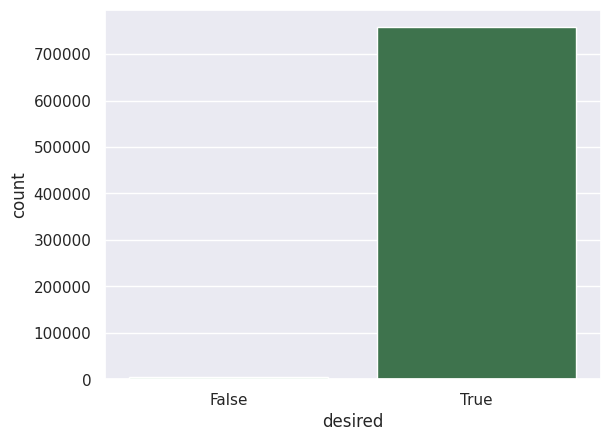

In [11]:
sns.countplot(x="desired", data=df, palette="Greens_d")

In [12]:
class_dist = df['desired'].value_counts()

print(class_dist)
prob_e = class_dist[0]/(class_dist[0]+class_dist[1])
prob_p = 1 - prob_e
print(prob_e)
print(prob_p)

True     757822
False      4731
Name: desired, dtype: int64
0.9937958410759645
0.006204158924035474


In [13]:
from sklearn.utils import resample

df_majority = df[df.desired==1]
df_minority = df[df.desired==0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=757822, random_state=123)

In [14]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # type: ignore

In [15]:
print(df_upsampled.columns)

Index(['count', 'maxRssiValue', 'minRssiValue', 'maxTimeStamp', 'minTimeStamp',
       'rssiDiff', 'seenDiff', 'antenna1', 'antenna2', 'antenna3', 'antenna4',
       'ts_percent0', 'ts_percent1', 'ts_percent2', 'ts_percent3',
       'ts_percent4', 'ts_percent5', 'ts_percent6', 'ts_percent7',
       'ts_percent8', 'rv_percent0', 'rv_percent1', 'rv_percent2',
       'rv_percent3', 'rv_percent4', 'rv_percent5', 'rv_percent6',
       'rv_percent7', 'rv_percent8', 'desired'],
      dtype='object')


In [16]:
class_dist = df_upsampled['desired'].value_counts()

print(class_dist)

True     757822
False    757822
Name: desired, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_upsampled.columns:
    df_upsampled[col] = labelencoder.fit_transform(df_upsampled[col])

df_upsampled.head()

,count,maxRssiValue,minRssiValue,maxTimeStamp,minTimeStamp,rssiDiff,seenDiff,antenna1,antenna2,antenna3,...,rv_percent0,rv_percent1,rv_percent2,rv_percent3,rv_percent4,rv_percent5,rv_percent6,rv_percent7,rv_percent8,desired
48,46,35,16,114650,0,23,192445,12,14,11,...,173,110,291,150,48,189,439,241,601,1
49,46,36,15,111668,1294,25,186534,12,12,11,...,167,122,322,163,50,206,480,285,709,1
50,48,35,17,115975,3822,22,189993,14,12,13,...,177,105,291,150,46,175,396,252,688,1
51,40,26,11,109472,5671,19,180079,7,11,11,...,137,84,233,120,38,143,323,182,465,1
52,43,34,21,93945,7183,17,158889,8,14,10,...,210,127,321,178,54,202,459,285,709,1


In [18]:
X = df_upsampled.drop('desired', axis=1)
y = df_upsampled['desired']
RS = 123

# Split dataframe into training and test/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)


In [19]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LGBMClassifier()]

In [ ]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry) # type: ignore

print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 99.6147%
Log Loss: 0.07964978341164428
